## MALL CUSTOMER SEGMENTATION

In [4]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Ignoring warnings for future code changes
import warnings
warnings.filterwarnings("ignore")

C:\Users\ilari\AppData\Local\Temp\ipykernel_11760\2784330470.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
# Importing data
df = pd.read_csv('Mall_Customers.csv')
df1 = df.copy(deep=True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### EXPLORATORY DATA ANALYSIS (EDA)

In [6]:
df.info()
# There are no null values
# Theres is 1 categorical column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe(include='all').T
# There are 200 entries, majority of females
# Min and Max seem legit, we could say at first glance there are not significant outliers 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,200.0,NaN,NaN,NaN,100.5,57.879185,1.0,50.75,100.5,150.25,200.0
Gender,200,2,Female,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,200.0,NaN,NaN,NaN,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,NaN,NaN,NaN,60.56,26.264721,15.0,41.5,61.5,78.0,137.0
Spending Score (1-100),200.0,NaN,NaN,NaN,50.2,25.823522,1.0,34.75,50.0,73.0,99.0


In [8]:
print(df.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


#### UNIVARIATE ANALYSIS - VISUALISATION
 Visualising single categories

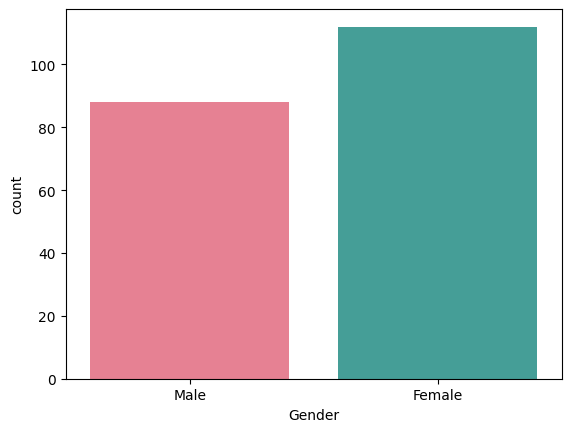

In [9]:
# Checking proportions of male anf female in the data set

sns.countplot(x='Gender', data=df, palette = 'husl')
plt.show()

In [10]:
# Printing exact percentage of male and female
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

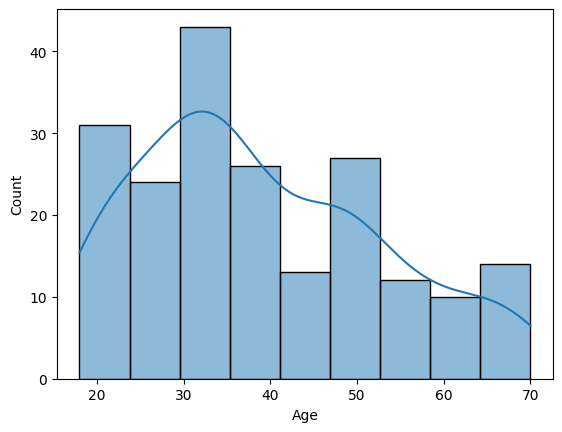

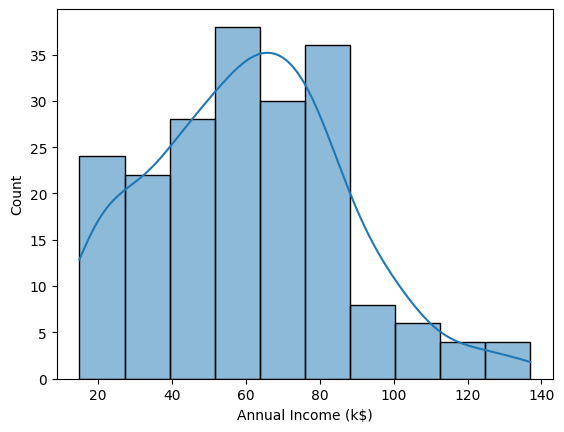

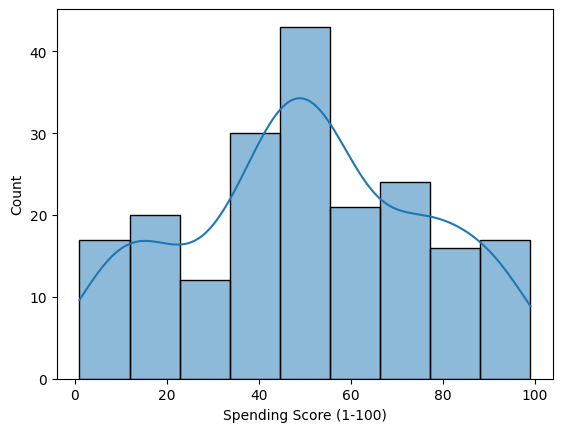

In [11]:
# Creating a list of all the numerical features I am interesting in visualising
numerical_columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

# Plotting histogram for each feature
for i in numerical_columns:
    #initialize a new plot for every iteration, otherwise it will just plot over
    plt.figure()
    sns.histplot(df[i], kde=True, palette='husl')
    #plt.title(f'{df[i].column_name} Didtribution')
    plt.show()


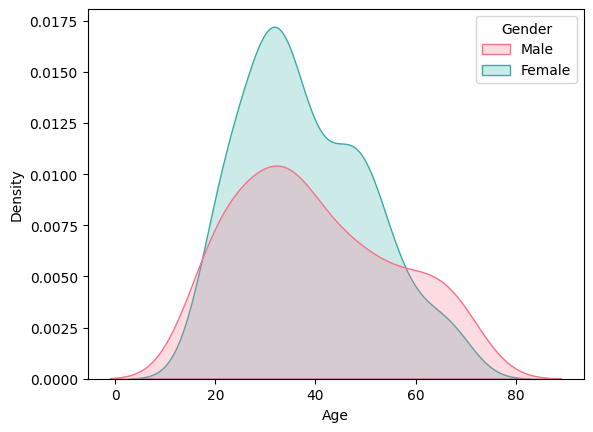

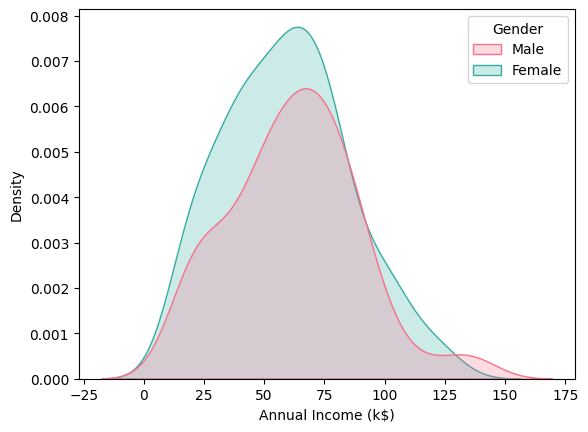

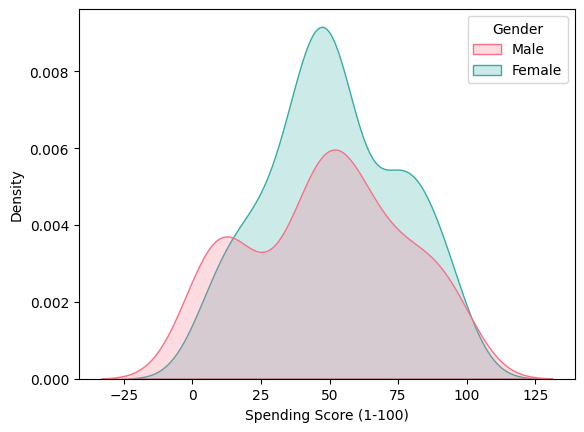

In [12]:
# Plotting kdeplot() using the 'Gender' dimension
# Kernel density estimation
for i in numerical_columns:
    plt.figure()
    sns.kdeplot(data=df, x=df[i], hue=df['Gender'], shade=True, palette='husl')

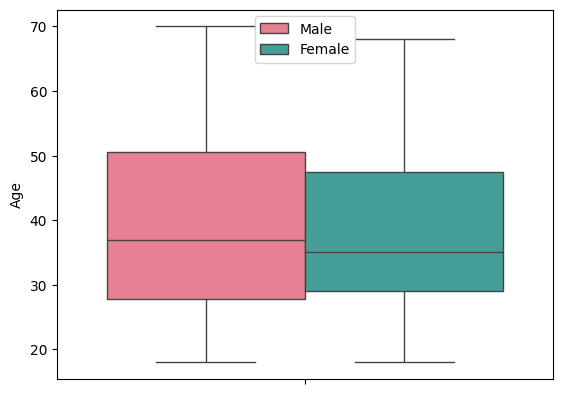

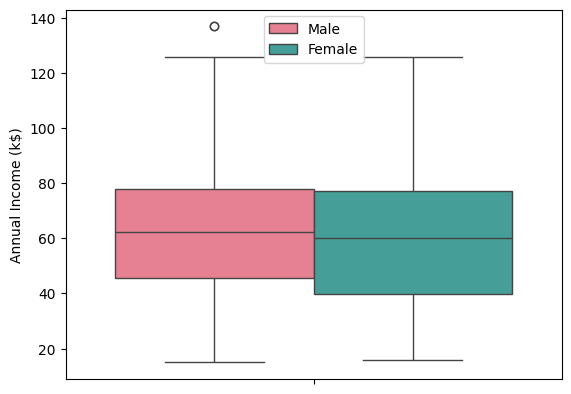

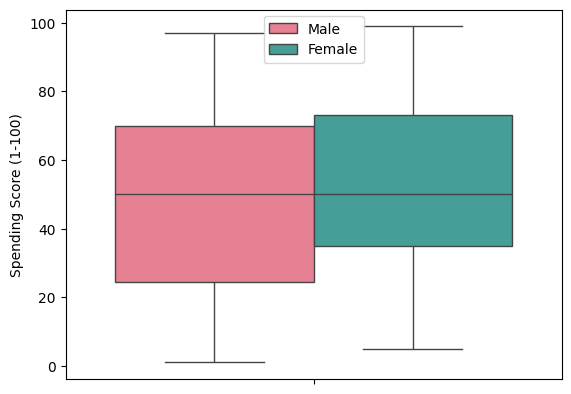

In [13]:
# Plotting boxplot for each feature using the 'Gender' dimension

for i in numerical_columns:
    plt.figure()
    sns.boxplot(data=df, y=df[i], hue=df['Gender'], palette='husl')
    plt.legend(loc='upper center')
    plt.show()

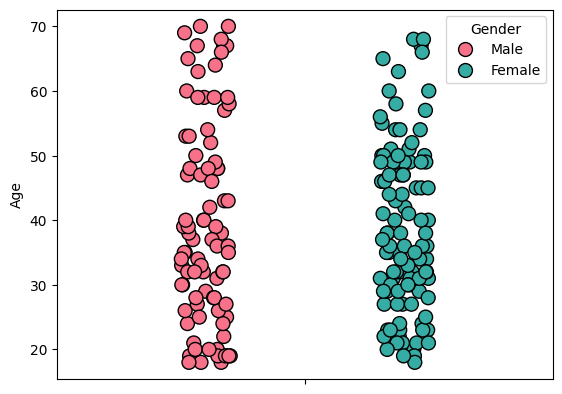

In [14]:
# Creating a single stripplot() for 'Age' with 'Gender' dimension

sns.stripplot(y='Age', data=df, hue='Gender', palette='husl',edgecolor='black', linewidth= 1, size=10, jitter=True, dodge=True)
plt.xlabel('')
plt.show()

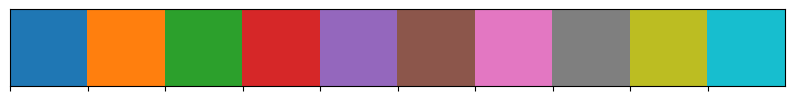

In [15]:
#checking default palette
sns.palplot(sns.color_palette())

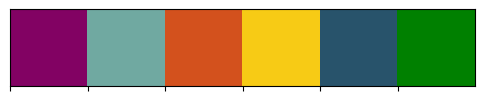

In [16]:
# Creating a palette
palette = sns.color_palette(['#820263','#70A9A1','#D3511D', '#F7CB15', '#28536B', 'green'])
sns.palplot(palette)

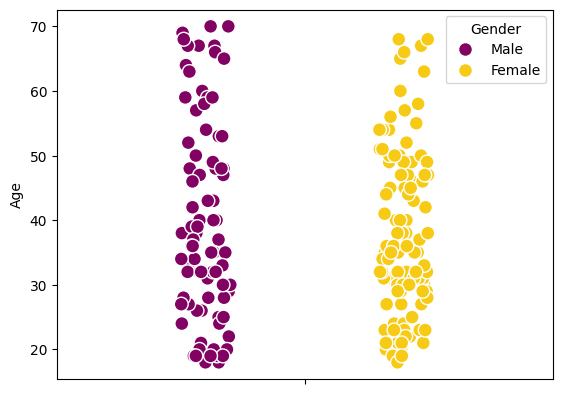

In [17]:
# Plotting stripplots for each feature using the 'Gender' dimension


sns.set_palette(['#820263','#F7CB15','#D3511D', '#70A9A1', '#28536B', 'green'])
sns.stripplot(y='Age', data=df, hue='Gender', edgecolor='white', linewidth=1, size=10, jitter=True, dodge=True)
plt.xlabel('')
plt.show()

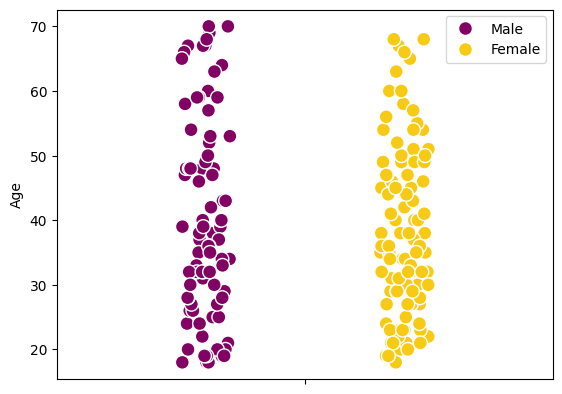

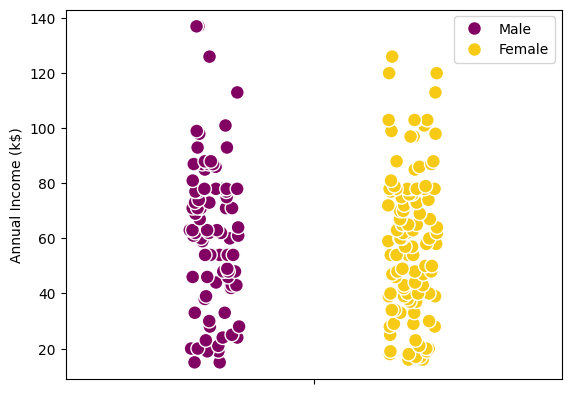

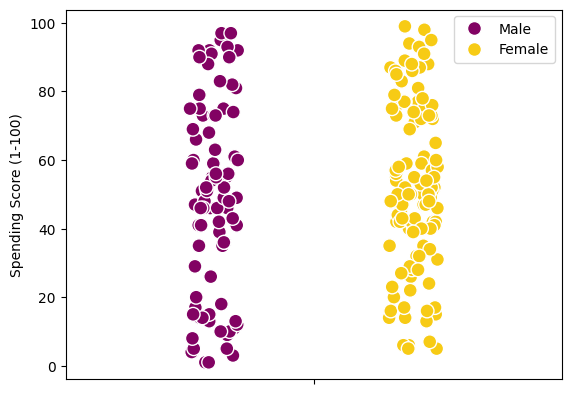

In [18]:
for i in numerical_columns:
    plt.figure()
    sns.set_palette(['#820263','#F7CB15','#D3511D', '#70A9A1', '#28536B', 'green'])
    sns.stripplot(data=df, y=df[i], hue=df['Gender'], edgecolor='white', linewidth=1, size=10, jitter=True, dodge=True)
    plt.legend()
    plt.xlabel('')
    plt.show()
    
    
    # We could identify some possible outliers in the annual income, but we are not sure yet if we want to dismiss that.
    # could be a small cluster to keep in consideration, after all they have money to spend and could be interesting 
    # if we want to diversy offer and attract a different clientele.

#### BIVARIATE ANALYSIS - VISUALISATION

In [19]:
print(df.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

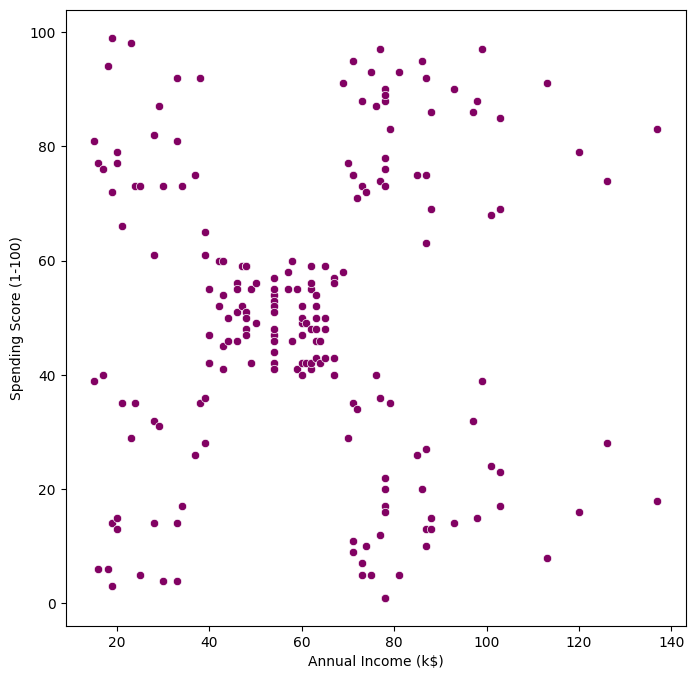

In [20]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

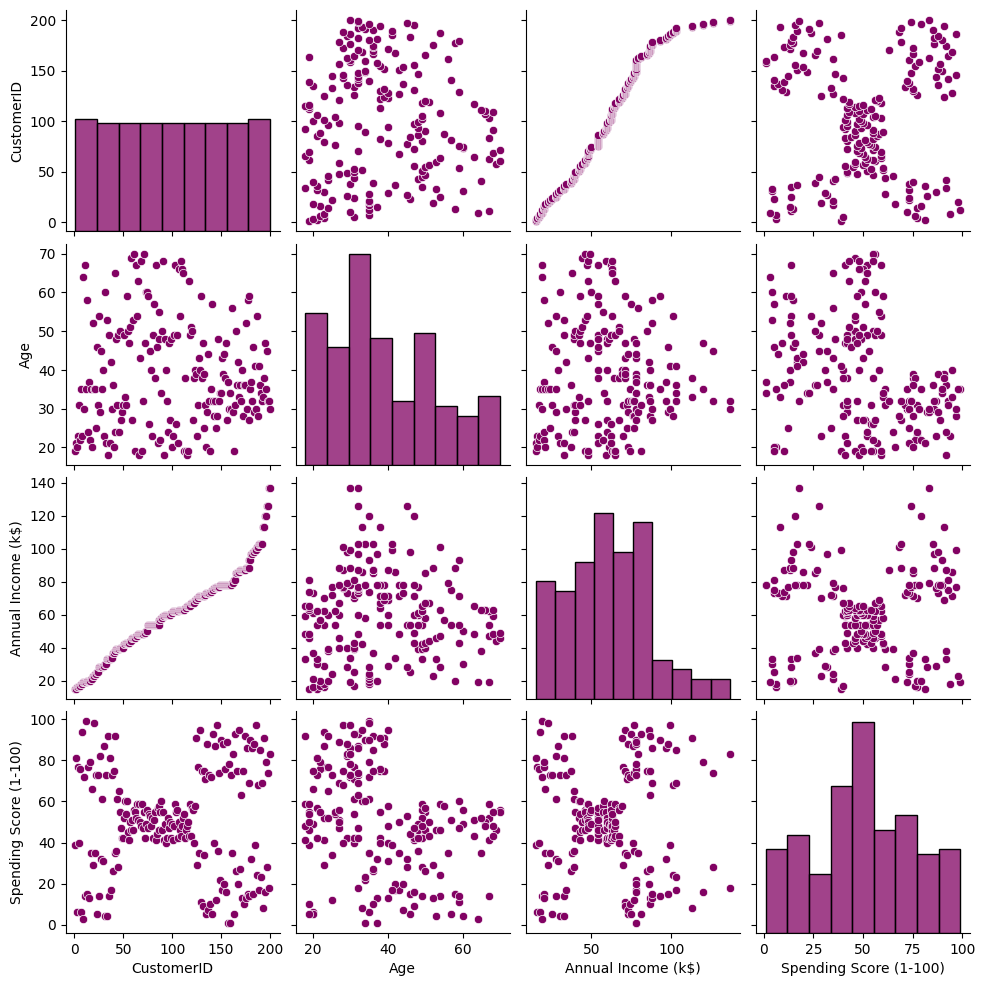

In [21]:
sns.pairplot(df)

In [22]:
# Customer ID doesnt carry any information relevant to our analysis, we can drop the feature from the data set, on the axis=1 (columns)
df=df.drop(['CustomerID'], axis=1)

In [23]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


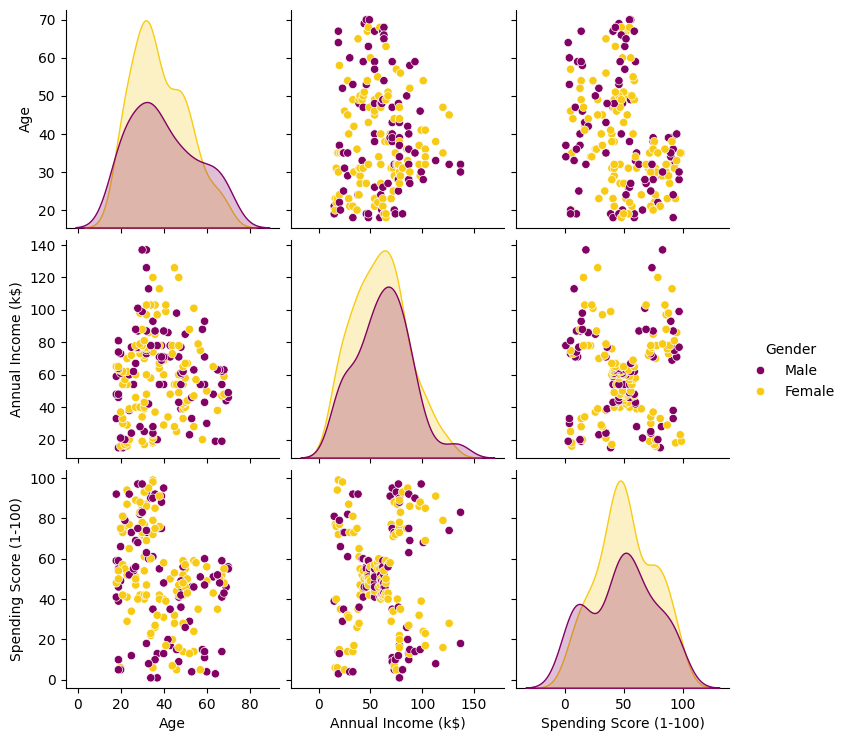

In [24]:
sns.pairplot(df, hue='Gender')
plt.show()

In [25]:
# Using group by to check the mean() of each feature by 'Gender'
df.groupby(by='Gender').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [26]:
# ONE-HOT CODING
# Hot-Encoding the Categorical Column 'Gender' to have it in corr()
df = pd.get_dummies(df, columns=['Gender'], drop_first=True, dtype = 'int')

In [27]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
Age,1.000000,-0.012398,-0.327227,0.060867
Annual Income (k$),-0.012398,1.000000,0.009903,0.056410
Spending Score (1-100),-0.327227,0.009903,1.000000,-0.058109
Gender_Male,0.060867,0.056410,-0.058109,1.000000


<Axes: >

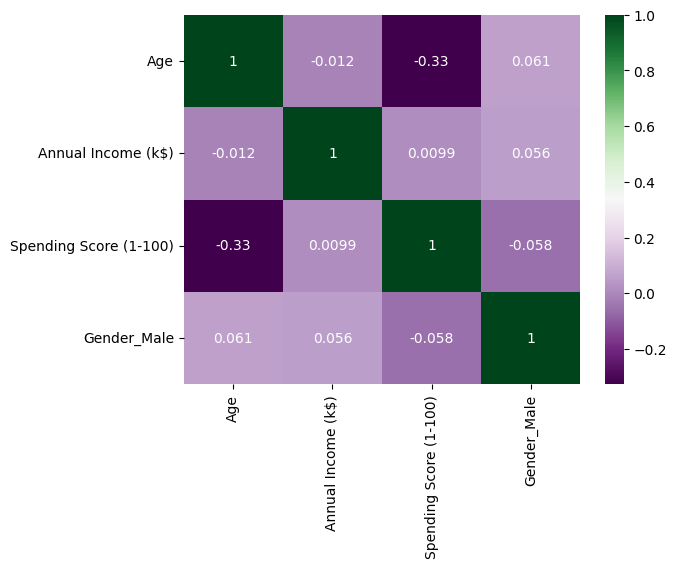

In [28]:
# Creating a corr() map
cmap = sns.diverging_palette(h_neg=260,h_pos=350,n=7,s=75,l=50, sep=50, center="light", as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap='PRGn')

<hr/>

## KMeans Clustering
KMeans(
    n_clusters: Int = 8,
    *,
    init: MatrixLike | ((...) -> Any) | Literal['k-means++', 'random'] = "k-means++",
    n_init: int | Literal['auto', 'warn'] = "warn",     max_iter: Int = 300,
    tol: Float = 0.0001,
    verbose: Int = 0,
    random_state: Int | None = None,
    copy_x: bool = True,
    algorithm: Literal['lloyd', 'elkan', 'auto', 'full'] = "lloyd"
 )
* Initiate
* Fit
* Predict

<hr/>

### ELBOW METHOD
Method to choose the best clusters number by checking model's inertia for every number of clusters, using a for loop.
Inertia is a success metric, distance between centroids.

In [29]:
# ELBOW METHOD
# Initialising an empty list for the inertia values
inertia_values=[]

# Calculating inertia values for each KMeans model number of clusters and adding it to the list
for i in range(1,11):
    km_model=KMeans(n_clusters=i, init='k-means++', max_iter=1000)
    km_model.fit(df[['Annual Income (k$)', 'Spending Score (1-100)' ]])
    inertia_values.append(km_model.inertia_)   

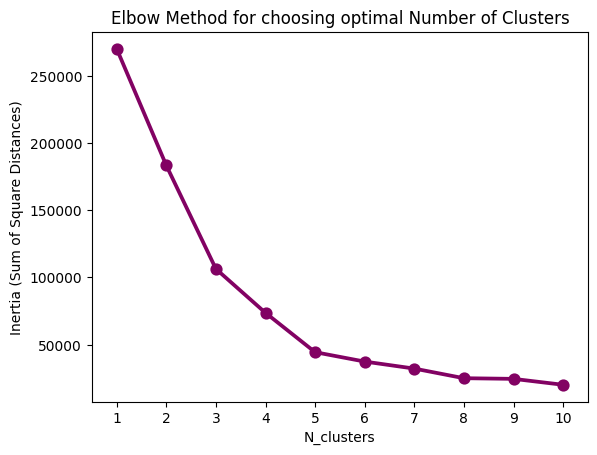

In [30]:
# ELBOW METHOD VISUALISATION
# Plotting the list with pointplot()
sns.pointplot(x=range(1,11), y=inertia_values)
plt.title('Elbow Method for choosing optimal Number of Clusters')
plt.xlabel('N_clusters')
plt.ylabel('Inertia (Sum of Square Distances)')
plt.show()

<hr/>

### SILHOUETTE METHOD

<hr/>

## Bivariate clustering

In [31]:
# INITIALISING KMeans MODEL
# The default number of clusters is 8 but with the elbow analysis I am choosing to use 6
KM_Model= KMeans(n_clusters=5, init='k-means++', max_iter=1000)

In [32]:
# FITTING THE MODEL
KM_Model.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

KMeans(max_iter=1000, n_clusters=5)

In [33]:
# ASSIGNING CLUSTERS LABELS TO DATA SET
df['Spending and Income Cluster'] = KM_Model.labels_
print('Labels', KM_Model.labels_)
df.head()

Labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 3 0 2 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 2 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0]


,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Spending and Income Cluster
0,19,15,39,1,1
1,21,15,81,1,1
2,20,16,6,0,1
3,23,16,77,0,1
4,31,17,40,0,1


In [34]:
df['Spending and Income Cluster'].value_counts()

Spending and Income Cluster
2    69
1    56
0    39
3    26
4    10
Name: count, dtype: int64

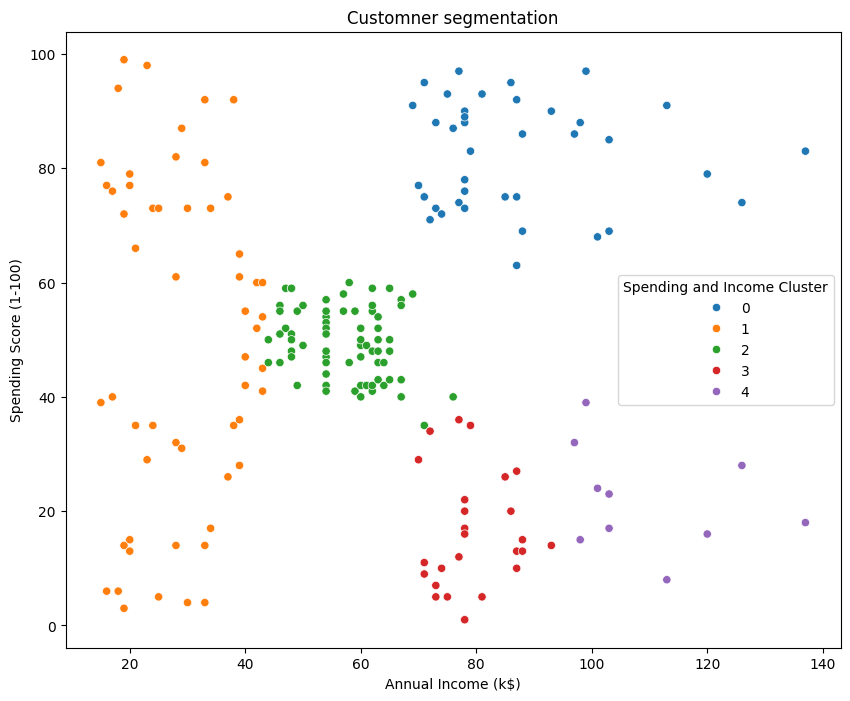

In [35]:
#VISUALING THE CLUSTERING
plt.figure(figsize=((10,8)))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster', palette ='tab10')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customner segmentation')
plt.show()

In [36]:
# CALCULATE CENTROIDS AND RETURN THEM IN A DATA FRAME
centroids = pd.DataFrame(KM_Model.cluster_centers_)
centroids.columns = ['x','y']
centroids

,x,y
0,86.538462,82.128205
1,29.035714,49.750000
2,57.275362,49.536232
3,79.307692,15.884615
4,109.700000,22.000000


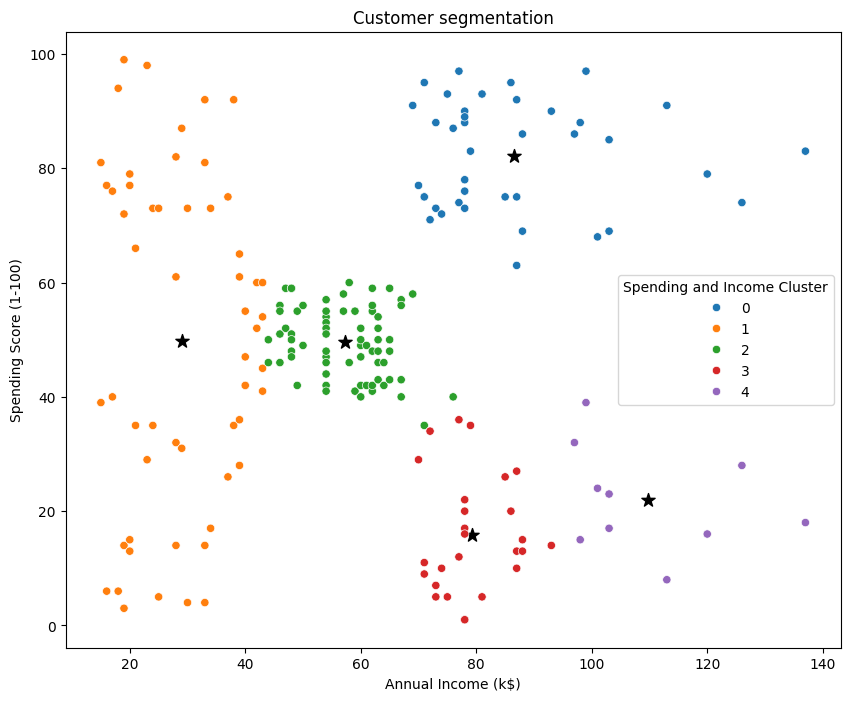

In [37]:
#VISUALING THE CLUSTERING WITH CENTROIDS
plt.figure(figsize=((10,8)))
plt.scatter(x=centroids['x'], y=centroids['y'], s=100, c='black', marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster', palette ='tab10')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer segmentation')
plt.show()

In [38]:
pd.crosstab(df['Spending and Income Cluster'], df1['Gender'])

Gender,Female,Male
Spending and Income Cluster,,
0,21,18
1,35,21
2,39,30
3,10,16
4,7,3


In [39]:
pd.crosstab(df['Spending and Income Cluster'], df1['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.538462,0.461538
1,0.625000,0.375000
2,0.565217,0.434783
3,0.384615,0.615385
4,0.700000,0.300000


In [40]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Spending and Income Cluster
0,19,15,39,1,1
1,21,15,81,1,1
2,20,16,6,0,1
3,23,16,77,0,1
4,31,17,40,0,1


In [41]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,32.692308,86.538462,82.128205
1,36.303571,29.035714,49.750000
2,43.449275,57.275362,49.536232
3,40.538462,79.307692,15.884615
4,41.000000,109.700000,22.000000
